In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KernelDensity
import pickle
import random


# Taste

In [25]:
with open(~'/STX_TasteSessions_alphapoint000_nvs.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

In [3]:
threshold = np.percentile(neuron_vs_score[:, 1], 80)

# Filter the array based on the threshold
filtered_array = neuron_vs_score[neuron_vs_score[:, 1] >= threshold]


In [26]:
top20taste = neuron_vs_score

In [27]:
taste_nonzero_results =pd.read_pickle(~'/STX_TasteSessions_alphapoint000.pkl')


In [28]:
len(taste_nonzero_results)

3648

In [7]:
excluded_numbers = [num for num in range() if all(num != row[0] for row in top20taste)]
len(excluded_numbers)

354

In [8]:
#get rid of all the trials from neurons which don't appear in the top 20%
# Assuming top20score is a 2D array (list of lists)


taste_nonzero_results = taste_nonzero_results[~taste_nonzero_results['Neuron'].isin(excluded_numbers)]

In [9]:
len(taste_nonzero_results)

14688

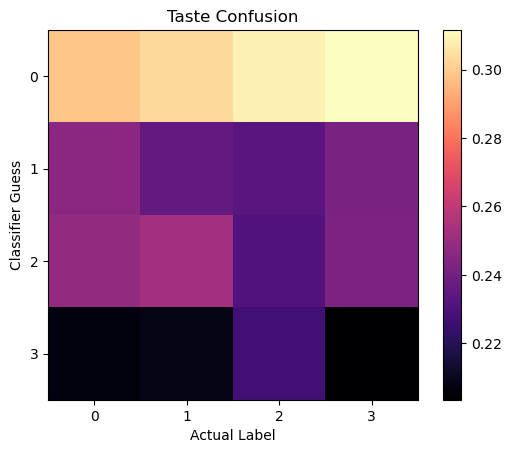

In [29]:
# confusion matrix creation:
taste_conf_matrix= np.zeros(shape=(4,4))
for actual in range(len(taste_nonzero_results['Taste'].unique())):
    xDF = taste_nonzero_results[(taste_nonzero_results['Taste'] == actual)]
    for guess in range(len(taste_nonzero_results['Taste'].unique())):
        taste_conf_matrix[guess, actual] = (xDF[guess].sum())/(xDF['count'].sum())
        
plt.imshow(taste_conf_matrix, cmap='magma')

plt.title('Taste Confusion')
plt.xlabel('Actual Label')
plt.ylabel('Classifier Guess')

plt.xticks(np.arange(len(taste_conf_matrix)), [0,1,2,3])
plt.yticks(np.arange(len(taste_conf_matrix)), [0,1,2,3])

#plt.tick_params(axis='x', which='both', labelbottom=False, labeltop=True)
#plt.clim(0.0,0.15)
plt.colorbar()
plt.show()

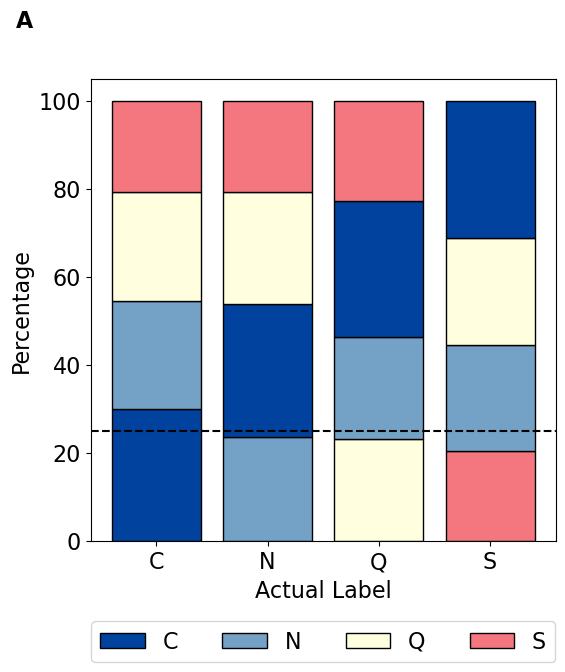

In [30]:
# Calculate percentages
percentages = taste_conf_matrix / taste_conf_matrix.sum(axis=0, keepdims=True) * 100
percentages[1][1], percentages[0][1], percentages[2][2], percentages[0][2] = \
    percentages[0][1], percentages[1][1], percentages[0][2], percentages[2][2]
percentages[3][3], percentages[0][3] = percentages[0][3], percentages[3][3]

# Create a stacked bar chart
num_bars = taste_conf_matrix.shape[1]
bar_width = 0.8  # You can adjust this based on your preference

fig, ax = plt.subplots(figsize=(6,6))

bottom = np.zeros(taste_conf_matrix.shape[0])

# Custom color palette with five colors
colors = [['#00429d', '#73a2c6', '#ffffe0', '#f4777f'],
          ['#73a2c6', '#00429d', '#73a2c6', '#73a2c6'],
          ['#ffffe0', '#ffffe0', '#00429d', '#ffffe0'],
          ['#f4777f', '#f4777f', '#f4777f', '#00429d'],
          ['#93003a', '#93003a', '#93003a', '#93003a']]

# Legend labels for each color
legend_labels = ['C', 'N', 'Q', 'S']

for i in range(num_bars):
    ax.bar(range(taste_conf_matrix.shape[0]), percentages[i, :], bottom=bottom, color=colors[i], edgecolor='black', label=legend_labels[i])
    bottom += percentages[i, :]

ax.set_xticks(np.arange(taste_conf_matrix.shape[0]))
ax.set_xticklabels(['C', 'N', 'Q', 'S'], fontsize=16)

# Add a horizontal dashed line at height 0.33
ax.axhline(y=25, color='black', linestyle='--')
ax.text(-0.16, 1.15, 'A', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
# Place the legend underneath the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_bars, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual Label', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
#plt.title('Classifier Confusion: Taste (top 20%, alpha=0.500)')

plt.show()


# 3 taste experiments

for each of the three taste experiments, adjust the file name, colors, and lables s.t. they correspond to the correct stimuli

In [19]:
with open('C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BayesScores_taste_013_alphapoint875.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

In [20]:
threshold = np.percentile(neuron_vs_score[:, 1], 80)

# Filter the array based on the threshold
filtered_array = neuron_vs_score[neuron_vs_score[:, 1] >= threshold]


In [21]:
top20taste = filtered_array

In [22]:
taste_nonzero_results =pd.read_pickle(
'C:/Users/nasha/OneDrive - Florida State University/BertramNeuroProj/Synthetic_Project/Bayesian Analysis notebooks/BA_nonzeroresultsDF_taste_013_alphapoint875.pkl')


In [23]:
taste_nonzero_results['Taste'].unique()

array([0, 1, 2])

In [24]:
excluded_numbers = [num for num in range(433) if all(num != row[0] for row in top20taste)]
len(excluded_numbers)

354

In [25]:
#get rid of all the trials from neurons which don't appear in the top 20%
# Assuming top20score is a 2D array (list of lists)


taste_nonzero_results = taste_nonzero_results[~taste_nonzero_results['Neuron'].isin(excluded_numbers)]

In [26]:
len(taste_nonzero_results)

10800

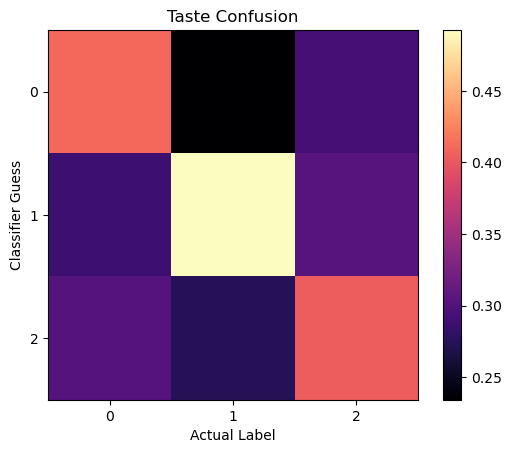

In [27]:
# confusion matrix creation:
taste_conf_matrix= np.zeros(shape=(3,3))
for actual in range(len(taste_nonzero_results['Taste'].unique())):
    xDF = taste_nonzero_results[(taste_nonzero_results['Taste'] == actual)]
    for guess in range(len(taste_nonzero_results['Taste'].unique())):
        taste_conf_matrix[guess, actual] = (xDF[guess].sum())/(xDF['count'].sum())
        
plt.imshow(taste_conf_matrix, cmap='magma')

plt.title('Taste Confusion')
plt.xlabel('Actual Label')
plt.ylabel('Classifier Guess')

plt.xticks(np.arange(len(taste_conf_matrix)), [0,1,2])
plt.yticks(np.arange(len(taste_conf_matrix)), [0,1,2])

#plt.tick_params(axis='x', which='both', labelbottom=False, labeltop=True)
#plt.clim(0.0,0.15)
plt.colorbar()
plt.show()

In [29]:
percentages

array([[41.0885989 , 49.23984381, 40.43847875],
       [28.70020604, 23.42776439, 30.34451902],
       [30.21119505, 27.33239179, 29.21700224]])

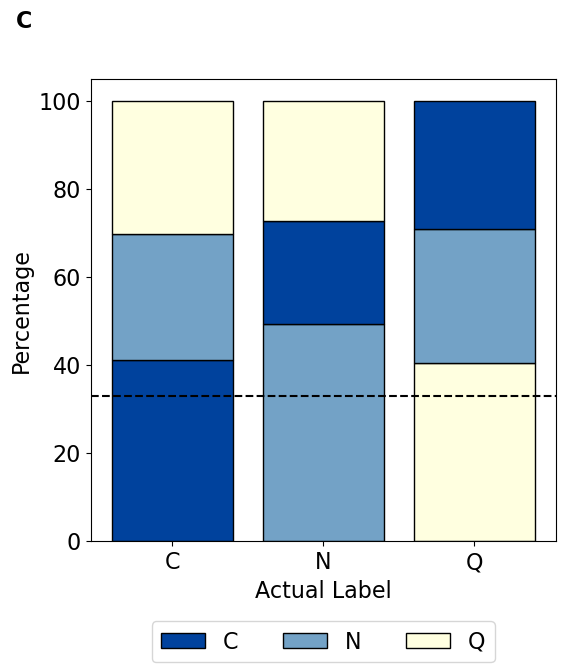

In [28]:
# Calculate percentages
percentages = taste_conf_matrix / taste_conf_matrix.sum(axis=0, keepdims=True) * 100
percentages[1][1], percentages[0][1], percentages[2][2], percentages[0][2] = \
    percentages[0][1], percentages[1][1], percentages[0][2], percentages[2][2]

# Create a stacked bar chart
num_bars = taste_conf_matrix.shape[1]
bar_width = 0.8  # You can adjust this based on your preference

fig, ax = plt.subplots(figsize=(6,6))

bottom = np.zeros(taste_conf_matrix.shape[0])

# Custom color palette with five colors
colors = [['#00429d', '#73a2c6', '#ffffe0', '#f4777f'],
          ['#73a2c6', '#00429d', '#73a2c6', '#73a2c6'],
          ['#ffffe0', '#ffffe0', '#00429d', '#ffffe0'],
          ['#f4777f', '#f4777f', '#f4777f', '#00429d']]

# Legend labels for each color
legend_labels = ['C', 'N', 'Q']

for i in range(num_bars):
    ax.bar(range(taste_conf_matrix.shape[0]), percentages[i, :], bottom=bottom, color=colors[i], edgecolor='black', label=legend_labels[i])
    bottom += percentages[i, :]

ax.set_xticks(np.arange(taste_conf_matrix.shape[0]))
ax.set_xticklabels(['C', 'N', 'Q'], fontsize=16)

# Add a horizontal dashed line at height 0.33
ax.axhline(y=33, color='black', linestyle='--')
ax.text(-0.16, 1.15, 'C', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
# Place the legend underneath the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_bars, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual Label', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
#plt.title('Classifier Confusion: Taste (top 20%, alpha=0.500)')

plt.show()


# Temperature:

- open the file which has the filtered neuron_vs_score array (s.t. the top 20% of neurons re:score are the only ones that matter)
- sort my temp_nonzero results matrix to only include neurons in the above list
- then make confusion matrix
- then make bar chart 

In [54]:
with open(~'/STX_TEMPboth_alphapoint625_nvs.pkl', 'rb') as f:
    neuron_vs_score = pickle.load(f)

In [55]:
threshold = np.percentile(neuron_vs_score[:, 1], 80)

# Filter the array based on the threshold
filtered_array = neuron_vs_score[neuron_vs_score[:, 1] >= threshold]
#np.save('temps_top20percent_alphapoint500_neuronVSscore.npy', filtered_array)

In [56]:
filtered_array[:,0]

array([ 25.,  27.,  30.,  31.,  35.,  36.,  59.,  69.,  75.,  80.,  99.,
       103., 126., 128., 130., 134., 136., 140., 154., 157., 167., 171.,
       175., 177., 178., 182., 183., 197., 200., 201., 203., 207., 208.,
       210., 211., 214., 216., 229., 232., 236., 240., 241.,   1.,  18.,
        22.,  24.,  25.,  26.,  34.,  35.,  37.,  38.,  39.,  41.,  48.,
        50.,  53.,  54.,  56.,  60.,  61.,  64.,  67.,  73.,  98., 101.,
       104., 108., 110., 111., 126., 142., 145., 156., 159., 162., 163.,
       168., 178., 182., 183., 189., 190., 193., 196., 198., 200., 202.,
       203., 205., 212., 213., 214., 216.])

In [57]:
#path = 'C:/Users/nasha/OneDrive - Florida State University/Temperature session'

#neuronDF =pd.read_pickle(f'{path}/NeuronDF.pickle')

In [58]:
#info = neuronDF[(neuronDF['Neuron'].isin(filtered_array[:,0])) & (neuronDF['Trial'] == 0) &(neuronDF['Taste'] == 0)]
#print(info.iloc[:,:4])

In [59]:
#print(info.iloc[:,:4].to_string())
#info.iloc[:,:4].to_csv('info_for_roberto.csv', index=False)

In [60]:
#top20score = np.load('temps_top20percent_alphapoint500_neuronVSscore.npy')
top20score = filtered_array

In [61]:
tempextra_nonzeroresults =pd.read_pickle(~'/STX_temp extra_alphapoint625.pkl')

tempsession_nonzeroresults =pd.read_pickle(~'/STX_TempSessions_alphapoint625.pkl')

temp_nonzero_results = pd.concat([tempsession_nonzeroresults,tempextra_nonzeroresults])

In [62]:
excluded_numbers = [num for num in range(433) if all(num != row[0] for row in top20score)]
len(excluded_numbers)

349

In [63]:
excluded_numbers

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 23,
 28,
 29,
 32,
 33,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 49,
 51,
 52,
 55,
 57,
 58,
 62,
 63,
 65,
 66,
 68,
 70,
 71,
 72,
 74,
 76,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 100,
 102,
 105,
 106,
 107,
 109,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 127,
 129,
 131,
 132,
 133,
 135,
 137,
 138,
 139,
 141,
 143,
 144,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 155,
 158,
 160,
 161,
 164,
 165,
 166,
 169,
 170,
 172,
 173,
 174,
 176,
 179,
 180,
 181,
 184,
 185,
 186,
 187,
 188,
 191,
 192,
 194,
 195,
 199,
 204,
 206,
 209,
 215,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 230,
 231,
 233,
 234,
 235,
 237,
 238,
 239,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 26

In [64]:
#get rid of all the trials from neurons which don't appear in the top 20%
# Assuming top20score is a 2D array (list of lists)


temp_nonzero_results = temp_nonzero_results[~temp_nonzero_results['Neuron'].isin(excluded_numbers)]

In [65]:
len(temp_nonzero_results['Neuron'].unique())

84

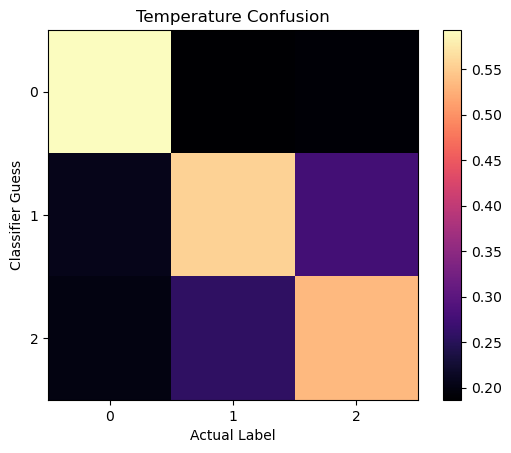

In [66]:
# confusion matrix creation:
conf_matrix= np.zeros(shape=(3,3))
for actual in range(len(temp_nonzero_results['Taste'].unique())):
    xDF = temp_nonzero_results[(temp_nonzero_results['Taste'] == actual)]
    for guess in range(len(temp_nonzero_results['Taste'].unique())):
        conf_matrix[guess, actual] = (xDF[guess].sum())/(xDF['count'].sum())
        
plt.imshow(conf_matrix, cmap='magma')

plt.title('Temperature Confusion')
plt.xlabel('Actual Label')
plt.ylabel('Classifier Guess')

plt.xticks(np.arange(len(conf_matrix)), [0, 1, 2])
plt.yticks(np.arange(len(conf_matrix)), [0, 1, 2])

#plt.tick_params(axis='x', which='both', labelbottom=False, labeltop=True)
#plt.clim(0.0,0.15)
plt.colorbar()
plt.show()

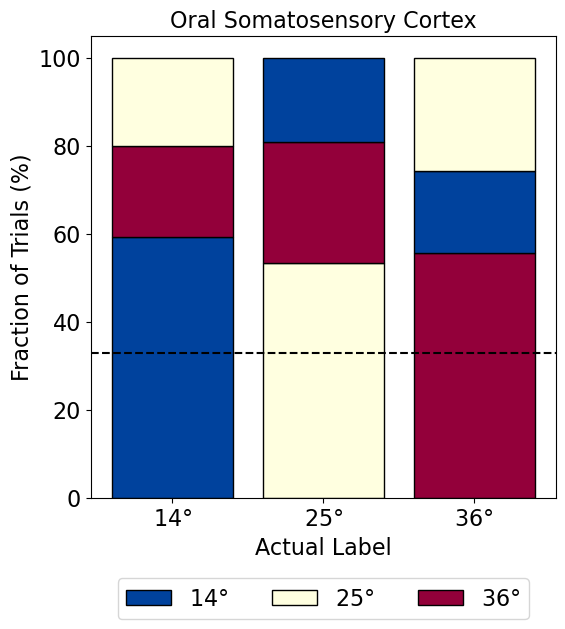

In [69]:
# Calculate percentages
percentages = conf_matrix / conf_matrix.sum(axis=0, keepdims=True) * 100

# Adjust percentages to make the correct guesses appear at the bottom of the plot
percentages[1][1], percentages[0][1], percentages[2][2], percentages[0][2] = \
    percentages[0][1], percentages[1][1], percentages[0][2], percentages[2][2]

percentages[:, [1, 2]] = percentages[:, [2, 1]]

# Create a stacked bar chart
num_bars = conf_matrix.shape[1]
bar_width = 0.2

fig, ax = plt.subplots(figsize=(6,6))

bottom = np.zeros(conf_matrix.shape[0])

# Define colors
colors = [['#00429d', '#ffffe0', '#93003a'],
          ['#93003a', '#93003a', '#00429d'],
          ['#ffffe0', '#00429d', '#ffffe0']]
# ['#00429d', '#93003a', '#ffffe0'] Hex codes for 'Cold', 'Hot', 'Room Temperature'
legend_labels = [r'$14\degree$', r'$36\degree$', r'$25\degree$']
for i in range(num_bars):
    ax.bar(range(conf_matrix.shape[0]), percentages[i, :], bottom=bottom, label=legend_labels[i], color=colors[i],
           edgecolor='black')
    bottom += percentages[i, :]

# Add a horizontal dashed line at height 0.33
ax.axhline(y=33, color='black', linestyle='--')

# Remove the line labeled "Random Guessing" from the legend
handles, labels = ax.get_legend_handles_labels()
handles = [handle for handle, label in zip(handles, labels) if label != 'Random Guessing']

# Swap the order of the last two entries in the legend
handles[-1], handles[-2] = handles[-2], handles[-1]
labels[-1], labels[-2] = labels[-2], labels[-1]

# Add a separate line for the modified legend underneath the plot
ax.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=num_bars+1, fontsize=16)
#ax.text(-0.16, 1.15, 'B', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
ax.set_xticks(np.arange(conf_matrix.shape[0]))
ax.set_xticklabels([r'$14\degree$', r'$25\degree$', r'$36\degree$'], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual Label', fontsize=16)
plt.ylabel('Fraction of Trials (%)', fontsize=16)
plt.title("Oral Somatosensory Cortex", fontsize=16)
#plt.title('Classifier Confusion: Temperatures (top 20%, alpha=0.500)')
plt.savefig('SomatosensoryConfusionBarchart.svg', format='svg')
plt.show()

In [52]:
print(percentages)

[[59.28213045 53.35135135 55.56635353]
 [20.70629101 27.6        18.68048807]
 [20.01157854 19.04864865 25.75315841]]


## 

### anova test with all temp comparisons

In [78]:
#GC temps
#open file with cold vs hot scores (temp codes 0 vs 1)
gcpath = '' #fill in appropriately 
gccoldhot = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_01_alphapoint875.pkl')
gccoldrt = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_02_alphapoint875.pkl')
gcrthot = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_21_alphapoint875.pkl')

gcdataset1_scores = np.sort(gccoldhot[:,1])[::-1][:int(0.2*len(gccoldhot[:,1]))]
gcdataset8_scores = np.sort(gccoldrt[:,1])[::-1][:int(0.2*len(gccoldrt[:,1]))]
gcdataset9_scores = np.sort(gcrthot[:,1])[::-1][:int(0.2*len(gcrthot[:,1]))]

#gcmeans_list = [np.mean(gcdataset1_scores),np.mean(gcdataset8_scores),np.mean(gcdataset9_scores)]
#gcdataset_list = [(gcdataset1_scores),(gcdataset8_scores),(gcdataset9_scores)]

#STX temps
#open file with cold vs hot scores (temp codes 0 vs 1)
path = '' #fill in appropriately 
coldhot = pd.read_pickle(f'{path}/STX_TempSessions_t01_alphapoint625_nvs.pkl')
coldrt = pd.read_pickle(f'{path}/STX_TempSessions_t02_alphapoint625_nvs.pkl')
rthot = pd.read_pickle(f'{path}/STX_TempSessions_t21_alphapoint625_nvs.pkl')

dataset1_scores = np.sort(coldhot[:,1])[::-1][:int(0.2*len(coldhot[:,1]))]
dataset8_scores = np.sort(coldrt[:,1])[::-1][:int(0.2*len(coldrt[:,1]))]
dataset9_scores = np.sort(rthot[:,1])[::-1][:int(0.2*len(rthot[:,1]))]

In [83]:
from statsmodels.stats.multitest import multipletests

# Combining all scores into a single array
all_scores = np.concatenate([gcdataset1_scores, gcdataset8_scores, gcdataset9_scores, dataset1_scores, dataset8_scores, dataset9_scores])

# Creating group labels
groups = ['GC14v36'] * len(gcdataset1_scores) + \
         ['GC14v25'] * len(gcdataset8_scores) + \
         ['GC25v36'] * len(gcdataset9_scores) + \
         ['STX14v25'] * len(dataset1_scores) + \
         ['STX14v36'] * len(dataset8_scores) + \
         ['STX25v36'] * len(dataset9_scores)

# Unique groups
unique_groups = np.unique(groups)

# Store comparisons and p-values
comparisons = []
p_values = []

# Perform pairwise t-tests
for i in range(len(unique_groups)):
    for j in range(i + 1, len(unique_groups)):
        group1_scores = all_scores[np.array(groups) == unique_groups[i]]
        group2_scores = all_scores[np.array(groups) == unique_groups[j]]
        
        # Perform t-test
        t_stat, p_value = stats.ttest_ind(group1_scores, group2_scores)
        
        # Store the comparison and p-value
        comparisons.append(f"{unique_groups[i]} vs {unique_groups[j]}")
        p_values.append(p_value)

# Apply Bonferroni correction to the p-values
_, corrected_p_values, _, _ = multipletests(p_values, method='bonferroni')

# Display the comparisons with corrected p-values
for comparison, corrected_p_value in zip(comparisons, corrected_p_values):
    print(f"Comparison: {comparison}, Corrected p-value: {corrected_p_value}")
             

Comparison: GC14v25 vs GC14v36, Corrected p-value: 3.3353307818302076e-26
Comparison: GC14v25 vs GC25v36, Corrected p-value: 5.767417490011597e-10
Comparison: GC14v25 vs STX14v25, Corrected p-value: 3.8945441618380346e-49
Comparison: GC14v25 vs STX14v36, Corrected p-value: 1.6111498147135963e-40
Comparison: GC14v25 vs STX25v36, Corrected p-value: 4.592415008530691e-20
Comparison: GC14v36 vs GC25v36, Corrected p-value: 9.09154898361681e-06
Comparison: GC14v36 vs STX14v25, Corrected p-value: 0.01709024769847628
Comparison: GC14v36 vs STX14v36, Corrected p-value: 1.0
Comparison: GC14v36 vs STX25v36, Corrected p-value: 0.0025798380135257227
Comparison: GC25v36 vs STX14v25, Corrected p-value: 8.616028633196945e-17
Comparison: GC25v36 vs STX14v36, Corrected p-value: 3.32004118035045e-11
Comparison: GC25v36 vs STX25v36, Corrected p-value: 0.5990316519800278
Comparison: STX14v25 vs STX14v36, Corrected p-value: 0.3204998594231191
Comparison: STX14v25 vs STX25v36, Corrected p-value: 1.1128829568

In [75]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

# Combining all scores into a single array
all_scores = np.concatenate([gcdataset1_scores, gcdataset8_scores, gcdataset9_scores, dataset1_scores, dataset8_scores, dataset9_scores])

# Creating group labels
groups = ['GC14v36'] * len(gcdataset1_scores) + \
         ['GC14v25'] * len(gcdataset8_scores) + \
         ['GC25v36'] * len(gcdataset9_scores) + \
         ['STX14v36'] * len(dataset1_scores) + \
         ['STX14v25'] * len(dataset8_scores) + \
         ['STX25v36'] * len(dataset9_scores)


anova_result = stats.f_oneway(gcdataset1_scores, gcdataset8_scores, gcdataset9_scores, dataset1_scores, dataset8_scores, dataset9_scores)
print(f"ANOVA result: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Performing Tukey's HSD test with Bonferroni correction
mc = MultiComparison(all_scores, groups)
tukey_result = mc.tukeyhsd(alpha=0.05/len(groups))  # Apply Bonferroni correction
print(tukey_result)

ANOVA result: F-value = 81.9440339151628, p-value = 1.3293739475987334e-63
  Multiple Comparison of Means - Tukey HSD, FWER=0.00   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 GC14v25  GC14v36   0.1339    0.0    0.09  0.1778   True
 GC14v25  GC25v36   0.0726    0.0  0.0287  0.1165   True
 GC14v25 STX14v25   0.1481    0.0   0.105  0.1913   True
 GC14v25 STX14v36   0.1659    0.0  0.1227   0.209   True
 GC14v25 STX25v36   0.0941    0.0  0.0509  0.1372   True
 GC14v36  GC25v36  -0.0613    0.0 -0.1052 -0.0174   True
 GC14v36 STX14v25   0.0142 0.6647  -0.029  0.0573  False
 GC14v36 STX14v36    0.032 0.0102 -0.0112  0.0751  False
 GC14v36 STX25v36  -0.0398 0.0004  -0.083  0.0033  False
 GC25v36 STX14v25   0.0755    0.0  0.0324  0.1187   True
 GC25v36 STX14v36   0.0933    0.0  0.0501  0.1364   True
 GC25v36 STX25v36   0.0215  0.209 -0.0217  0.0646  False
STX14v25 STX14v36   0.0178  0.398 -0.0247  0.0602  False
STX14v25 STX2

## now for different amts of points

In [76]:
#GC temps
#open file with cold vs hot scores (temp codes 0 vs 1)
gcpath = '' #fill in appropriately 
gccoldhot = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_01_alphapoint875.pkl')
gccoldrt = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_02_alphapoint875.pkl')
gcrthot = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_21_alphapoint875.pkl')

gcdataset1_scores = np.sort(gccoldhot[:,1])[::-1][:int(0.25*len(gccoldhot[:,1]))]
gcdataset8_scores = np.sort(gccoldrt[:,1])[::-1][:int(0.25*len(gccoldrt[:,1]))]
gcdataset9_scores = np.sort(gcrthot[:,1])[::-1][:int(0.25*len(gcrthot[:,1]))]

#gcmeans_list = [np.mean(gcdataset1_scores),np.mean(gcdataset8_scores),np.mean(gcdataset9_scores)]
#gcdataset_list = [(gcdataset1_scores),(gcdataset8_scores),(gcdataset9_scores)]

#STX temps
#open file with cold vs hot scores (temp codes 0 vs 1)
path = '' #fill in appropriately 
coldhot = pd.read_pickle(f'{path}/STX_TempSessions_t01_alphapoint625_nvs.pkl')
coldrt = pd.read_pickle(f'{path}/STX_TempSessions_t02_alphapoint625_nvs.pkl')
rthot = pd.read_pickle(f'{path}/STX_TempSessions_t21_alphapoint625_nvs.pkl')

dataset1_scores = np.sort(coldhot[:,1])[::-1][:int(0.25*len(coldhot[:,1]))]
dataset8_scores = np.sort(coldrt[:,1])[::-1][:int(0.25*len(coldrt[:,1]))]
dataset9_scores = np.sort(rthot[:,1])[::-1][:int(0.25*len(rthot[:,1]))]

# Combining all scores into a single array
all_scores = np.concatenate([gcdataset1_scores, gcdataset8_scores, gcdataset9_scores, dataset1_scores, dataset8_scores, dataset9_scores])

# Creating group labels
groups = ['GC14v36'] * len(gcdataset1_scores) + \
         ['GC14v25'] * len(gcdataset8_scores) + \
         ['GC25v36'] * len(gcdataset9_scores) + \
         ['STX14v36'] * len(dataset1_scores) + \
         ['STX14v25'] * len(dataset8_scores) + \
         ['STX25v36'] * len(dataset9_scores)


anova_result = stats.f_oneway(gcdataset1_scores, gcdataset8_scores, gcdataset9_scores, dataset1_scores, dataset8_scores, dataset9_scores)
print(f"ANOVA result: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Performing Tukey's HSD test with Bonferroni correction
mc = MultiComparison(all_scores, groups)
tukey_result = mc.tukeyhsd(alpha=0.05/len(groups))  # Apply Bonferroni correction
print(tukey_result)

ANOVA result: F-value = 88.61265443300586, p-value = 2.427570480435793e-71
  Multiple Comparison of Means - Tukey HSD, FWER=0.00   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 GC14v25  GC14v36   0.1256    0.0  0.0836  0.1675   True
 GC14v25  GC25v36   0.0661    0.0  0.0241   0.108   True
 GC14v25 STX14v25   0.1454    0.0  0.1041  0.1866   True
 GC14v25 STX14v36   0.1639    0.0  0.1226  0.2051   True
 GC14v25 STX25v36   0.0921    0.0  0.0508  0.1333   True
 GC14v36  GC25v36  -0.0595    0.0 -0.1014 -0.0176   True
 GC14v36 STX14v25   0.0198 0.2359 -0.0215  0.0611  False
 GC14v36 STX14v36   0.0383 0.0003  -0.003  0.0796  False
 GC14v36 STX25v36  -0.0335 0.0028 -0.0748  0.0078  False
 GC25v36 STX14v25   0.0793    0.0   0.038  0.1206   True
 GC25v36 STX14v36   0.0978    0.0  0.0565  0.1391   True
 GC25v36 STX25v36    0.026 0.0447 -0.0153  0.0673  False
STX14v25 STX14v36   0.0185 0.2915 -0.0221  0.0591  False
STX14v25 STX2

In [77]:
#GC temps
#open file with cold vs hot scores (temp codes 0 vs 1)
gcpath = '' #fill in appropriately 
gccoldhot = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_01_alphapoint875.pkl')
gccoldrt = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_02_alphapoint875.pkl')
gcrthot = pd.read_pickle(f'{gcpath}/BA_TempDat/BayesScores_TempDat_21_alphapoint875.pkl')

gcdataset1_scores = np.sort(gccoldhot[:,1])[::-1][:int(0.15*len(gccoldhot[:,1]))]
gcdataset8_scores = np.sort(gccoldrt[:,1])[::-1][:int(0.15*len(gccoldrt[:,1]))]
gcdataset9_scores = np.sort(gcrthot[:,1])[::-1][:int(0.15*len(gcrthot[:,1]))]

#gcmeans_list = [np.mean(gcdataset1_scores),np.mean(gcdataset8_scores),np.mean(gcdataset9_scores)]
#gcdataset_list = [(gcdataset1_scores),(gcdataset8_scores),(gcdataset9_scores)]

#STX temps
#open file with cold vs hot scores (temp codes 0 vs 1)
path = '' #fill in appropriately 
coldhot = pd.read_pickle(f'{path}/STX_TempSessions_t01_alphapoint625_nvs.pkl')
coldrt = pd.read_pickle(f'{path}/STX_TempSessions_t02_alphapoint625_nvs.pkl')
rthot = pd.read_pickle(f'{path}/STX_TempSessions_t21_alphapoint625_nvs.pkl')

dataset1_scores = np.sort(coldhot[:,1])[::-1][:int(0.15*len(coldhot[:,1]))]
dataset8_scores = np.sort(coldrt[:,1])[::-1][:int(0.15*len(coldrt[:,1]))]
dataset9_scores = np.sort(rthot[:,1])[::-1][:int(0.15*len(rthot[:,1]))]

# Combining all scores into a single array
all_scores = np.concatenate([gcdataset1_scores, gcdataset8_scores, gcdataset9_scores, dataset1_scores, dataset8_scores, dataset9_scores])

# Creating group labels
groups = ['GC14v36'] * len(gcdataset1_scores) + \
         ['GC14v25'] * len(gcdataset8_scores) + \
         ['GC25v36'] * len(gcdataset9_scores) + \
         ['STX14v36'] * len(dataset1_scores) + \
         ['STX14v25'] * len(dataset8_scores) + \
         ['STX25v36'] * len(dataset9_scores)


anova_result = stats.f_oneway(gcdataset1_scores, gcdataset8_scores, gcdataset9_scores, dataset1_scores, dataset8_scores, dataset9_scores)
print(f"ANOVA result: F-value = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Performing Tukey's HSD test with Bonferroni correction
mc = MultiComparison(all_scores, groups)
tukey_result = mc.tukeyhsd(alpha=0.05/len(groups))  # Apply Bonferroni correction
print(tukey_result)

ANOVA result: F-value = 73.78309018116099, p-value = 2.2648031905881304e-54
  Multiple Comparison of Means - Tukey HSD, FWER=0.00   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 GC14v25  GC14v36   0.1453    0.0  0.0988  0.1917   True
 GC14v25  GC25v36   0.0808    0.0  0.0344  0.1272   True
 GC14v25 STX14v25   0.1504    0.0  0.1049   0.196   True
 GC14v25 STX14v36   0.1663    0.0  0.1207  0.2119   True
 GC14v25 STX25v36   0.0959    0.0  0.0503  0.1414   True
 GC14v36  GC25v36  -0.0644    0.0 -0.1109  -0.018   True
 GC14v36 STX14v25   0.0052 0.9957 -0.0404  0.0508  False
 GC14v36 STX14v36    0.021 0.3001 -0.0246  0.0666  False
 GC14v36 STX25v36  -0.0494    0.0  -0.095 -0.0038   True
 GC25v36 STX14v25   0.0696    0.0  0.0241  0.1152   True
 GC25v36 STX14v36   0.0855    0.0  0.0399   0.131   True
 GC25v36 STX25v36   0.0151 0.6713 -0.0305  0.0606  False
STX14v25 STX14v36   0.0158  0.601 -0.0289  0.0605  False
STX14v25 STX